In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
%matplotlib inline

In [15]:
def report_string_to_dict(report):
    report_dict = {}
    metrics = report.split('\n')[0].split()
    for row in report.split('\n')[1:]:
        splitted = row.split()
        if len(splitted) > 4:
            class_name_size = len(splitted[0:-4])
            class_name = " ".join(splitted[0:-4])
            report_dict[class_name] = {}
            for metric_index in range(len(metrics)):
                metric = metrics[metric_index]
                metric_val = splitted[metric_index + class_name_size]
                report_dict[class_name][metric] = metric_val
        elif len(splitted) > 0:
            metric = splitted[0]
            report_dict[metric] = {}
            report_dict[metric][metrics[-2]] = splitted[1]
            report_dict[metric][metrics[-1]] = splitted[2]
    return report_dict

In [16]:
def csv_to_dataframe(csv_name, csv_folder = ""):
    if len(csv_folder) == 0:
        return pd.read_csv(csv_name + ".csv")
    else:
        return pd.read_csv(csv_folder + "/" + csv_name + ".csv")

In [17]:
def get_metrics_avg(csv_name, dataset_name, model_name, folder_name = "", filter_dataset = True):
    df = csv_to_dataframe(csv_name, folder_name)
    
    if filter_dataset:
        df = df.loc[df['dataset'] == dataset_name]
        
    df = df.loc[df['model'] == model_name]
    reports_string = df['report'].tolist()
    reports = []
    for report in reports_string:
        reports.append(report_string_to_dict(report))

    accuracy = []
    f1_score = []
    f1_score_weighted = []

    for report in reports:
        accuracy.append(float(report['accuracy']['f1-score']))
        f1_score.append(float(report['macro avg']['f1-score']))
        f1_score_weighted.append(float(report['weighted avg']['f1-score']))

    accuracy_dev = round(stdev(accuracy), 3)
    f1_score_dev = round(stdev(accuracy), 3)
    f1_score_weighted_dev = round(stdev(accuracy), 3)

    accuracy_avg = round(mean(accuracy), 3)
    f1_score_avg = round(mean(f1_score), 3)
    f1_score_weighted_avg = round(mean(f1_score_weighted), 3)

    result = {
        'accuracy': {
            'avg' : accuracy_avg,
            'dev' : accuracy_dev
        },
        'f1_score': {
            'avg' : f1_score_avg,
            'dev' : f1_score_dev
        },
        'f1_score_weighted': {
            'avg' : f1_score_weighted_avg,
            'dev' : f1_score_weighted_dev
        },
    }

    return result

In [18]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.535, 'dev': 0.065},
 'f1_score': {'avg': 0.393, 'dev': 0.065},
 'f1_score_weighted': {'avg': 0.402, 'dev': 0.065}}

In [19]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.571, 'dev': 0.069},
 'f1_score': {'avg': 0.425, 'dev': 0.069},
 'f1_score_weighted': {'avg': 0.449, 'dev': 0.069}}

In [20]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'hsgs', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.478, 'dev': 0.092},
 'f1_score': {'avg': 0.395, 'dev': 0.092},
 'f1_score_weighted': {'avg': 0.372, 'dev': 0.092}}

In [21]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.451, 'dev': 0.063},
 'f1_score': {'avg': 0.329, 'dev': 0.063},
 'f1_score_weighted': {'avg': 0.301, 'dev': 0.063}}

In [22]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.318, 'dev': 0.097},
 'f1_score': {'avg': 0.17, 'dev': 0.097},
 'f1_score_weighted': {'avg': 0.203, 'dev': 0.097}}

In [23]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.321, 'dev': 0.13},
 'f1_score': {'avg': 0.187, 'dev': 0.13},
 'f1_score_weighted': {'avg': 0.209, 'dev': 0.13}}

In [24]:
def get_tp_and_fp_ratio_from_csv(csv_name, folder_name, index):
    df = csv_to_dataframe(csv_name, folder_name)

    matrix_str = df.iloc[index]['matrix']
    matrix_str = matrix_str.replace("[", "")
    matrix_str = matrix_str.replace("]", "")

    matrix = []
    for line in matrix_str.split('\n'):
        matrix.append([])
        for element in line.strip().split():
            matrix[-1].append(int(element))
    tp_ratio = round(matrix[1][1]/(matrix[1][1] + matrix[1][0]), 3)
    fp_ratio = round(matrix[0][1]/(matrix[1][1] + matrix[1][0]), 3)
    return tp_ratio, fp_ratio

In [25]:
def plot_roc(ratios_and_labels, filename = ""):
    plt.title('Receiver Operating Characteristic')
    color_index = 0
    colors = ['bo', 'ro', 'g+', 'ko', 'yo']
    for ratio_and_label in ratios_and_labels:
        plt.plot(ratio_and_label[1], ratio_and_label[0], colors[color_index], label=ratio_and_label[2])
        color_index += 1
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    if len(filename) > 0:
        plt.savefig(filename)

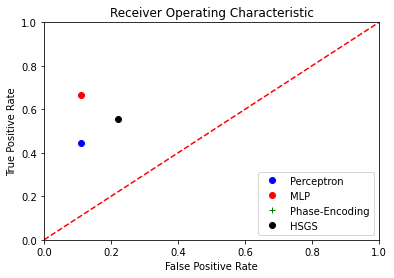

In [26]:
tp_perceptron, fp_perceptron = get_tp_and_fp_ratio_from_csv('classic_models_results', 'results', 6)
tp_mlp, fp_mlp = get_tp_and_fp_ratio_from_csv('classic_models_results', 'results', 21)
tp_phase, fp_phase = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 21)
tp_hsgs, fp_hsgs = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 4)

plot_roc([[tp_perceptron, fp_perceptron, 'Perceptron'],
           [tp_mlp, fp_mlp, 'MLP'],
           [tp_phase, fp_phase, 'Phase-Encoding'],
           [tp_hsgs, fp_hsgs, 'HSGS']], "results/caesarian_roc.png")